# To do voor dinsdag 20 juni
1. Write introduction according to format
2. Write down the node representaions, link representations and node attributes of networks.
3. Make at least final 4 visualizations
4. Write text to support the visualisations
5. Have sketches or drafts of other 2-4 visualizations

# Table of contents
1. Introduction
2. Datasets and preprocessing
3. Visualisations
    - property 1 etc.
4. Reflection
5. Work distribution


# 1. Introduction
Uit dit stuk tekst moet duidelijk worden:
- Aims and Goals of the project
- Take a general audience into network science: the project is designed to include a person with little knowledge of networks in understanding properties of networks
    - What is a network?
    - What does a network consist of?
    - 
- explain the multiple perspectives


The aim of this project is to use network science theory and networkx to compare properties of the social networks. A network is a web that consists of nodes and edges. People, devices or other objects are represented as nodes and the edges represent the relationships between these nodes. All these nodes and edges together form a network.

The project is designed to include a person with little knowledge of networks in understanding properties of networks. For this reason the metrics used to describe the networks will vary from simple properties such as size and density of a network, to more complex network properties such as different measures of centrality and small world property. These properties will be explained in more detail in the project.

# 2. Datasets and preprocessing
This project is based on three different datasets of social networks that can be found on Kaggle.(reffer to links). Each dataset is a representation of a network in the form of a list of edges. To some datasets there is also a file added with node attributes. This file is often a `.json` file. The latest dataset is slightly different from the first two. Unique to this dataset, is the fact that it is a dataset containing multiple datasets of social networks.

Before the datasets can be read in, it is necessary to manually select which datasets will and will not be selected for the project. This selection is based on the size of the datasets to reduce the risk of very long processing times. The table below is an overview of all the different networks, retrieved from the datasets, that will be used in this project. For each network, it is given what its node representation is, what its link representation is and what the node attributes are if applicable.

|Dataset|Node representation|Link representation|Node attributes if applicable|
|---|---|---|---|
|**NashvilleMeetupNetwork**|Member of a Meetup group|Shared group membership in 'weight' groups|n/a|
|**DeezerHR**|Deezer users from Croatia|The relation friendship|Genre preferences of each user|
|**DeezerHU**|Deezer users from Hungary|The relation friendship|Genre preferences of each user|
|**DeezerRO**|Deezer users from Romania|The relation friendship|Genre preferences of each user|
|**FacebookLargePage**|Official Facebook pages| The amount of mutual likes between pages| Descriptions of the purpose of the site|
|**FeatherDeezerSocial**|Deezer users from Europe|The relation friendship|Artists liked by the users|
|**FeatherLastfmSocial**|
|**GithubSocial**|
|**TwitchSocialNetworks**|
|**TwitchSocialNetworksDE**|
|**TwitchSocialNetworksENGB**|
|**TwitchSocialNetworksES**|
|**TwitchSocialNetworksFR**|
|**TwitchSocialNetworksPTBR**|
|**TwitchSocialNetworksRU**|
|**SocEpinions1**|
|**SocSignSlashdot081106**|
|**SocSignSlashdot090216**|
|**SocSignSlashdot090221**|
|**SocSlashdot0811**|
|**SocSlashdot0902**|

Other basic info that is excluded:
- Time span of the network
- Where the data is retrieved from

## Importing the relevant python libaries

In [7]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import time
import preprocessing
import random

## Preprocessing non-csv datasets
Some datasets of networks have their edges saved in a `.txt` file while others in a `.csv` file. In order to read the edges with the pandas read_csv function those `.txt` files need to be converted tot `.csv` files. A function is used to accomplish this that can be found in the `preprocessing.py` file. 
- soc-Epinions1.txt
- soc-sign-Slashdot081106.txt
- soc-sign-Slashdot090216.txt
- soc-sign-Slashdot090221.txt
- soc-Slashdot0811.txt
- soc-Slashdot0902.txt

In [8]:
# preprocessing.transform_text_to_csv('datasets/soc-Epinions1.txt', 'datasets/soc-Epinions1.csv')
# preprocessing.transform_text_to_csv('datasets/soc-sign-Slashdot081106.txt', 'datasets/soc-sign-Slashdot081106.csv')
# preprocessing.transform_text_to_csv('datasets/soc-sign-Slashdot090216.txt', 'datasets/soc-sign-Slashdot090216.csv')
# preprocessing.transform_text_to_csv('datasets/soc-sign-Slashdot090221.txt', 'datasets/soc-sign-Slashdot090221.csv')
# preprocessing.transform_text_to_csv('datasets/soc-Slashdot0811.txt', 'datasets/soc-Slashdot0811.csv')
# preprocessing.transform_text_to_csv('datasets/soc-Slashdot0902.txt', 'datasets/soc-Slashdot0902.csv')

## Read in datasets with pandas
The datasets can be easily read in with pandas.

In [9]:
NashvilleMeetupNetwork_member_edges = pd.read_csv('datasets/NashvilleMeetupNetwork/member-edges.csv', index_col=0)
DeezerHR_edges = pd.read_csv('datasets/DeezerSocialNetworks/HR/HR_edges.csv')
DeezerHU_edges = pd.read_csv('datasets/DeezerSocialNetworks/HU/HU_edges.csv')
DeezerRO_edges = pd.read_csv('datasets/DeezerSocialNetworks/RO/RO_edges.csv')
FacebookLargePage_edges = pd.read_csv('datasets/facebook-large-page-page-network/musae_facebook_edges.csv')
FeatherDeezerSocial_edges = pd.read_csv('datasets/feather-deezer-social/deezer_europe_edges.csv')
FeatherLastfmSocial_edges = pd.read_csv('datasets/feather-lastfm-social/lastfm_asia_edges.csv')
GithubSocial_edges = pd.read_csv("datasets/github-social/musae_git_edges.csv")
TwitchSocialNetworksDE_edges = pd.read_csv("datasets/twitch-social-networks/DE/musae_DE_edges.csv")
TwitchSocialNetworksENGB_edges = pd.read_csv("datasets/twitch-social-networks/ENGB/musae_ENGB_edges.csv")
TwitchSocialNetworksES_edges = pd.read_csv("datasets/twitch-social-networks/ES/musae_ES_edges.csv")
TwitchSocialNetworksFR_edges = pd.read_csv("datasets/twitch-social-networks/FR/musae_FR_edges.csv")
TwitchSocialNetworksPTBR_edges = pd.read_csv("datasets/twitch-social-networks/PTBR/musae_PTBR_edges.csv")
TwitchSocialNetworksRU_edges = pd.read_csv("datasets/twitch-social-networks/RU/musae_RU_edges.csv")
SocEpinions1_edges = pd.read_csv('datasets/soc-Epinions1.csv')
SocSignSlashdot090221_edges = pd.read_csv('datasets/soc-sign-Slashdot090221.csv')
SocSlashdot0902_edges = pd.read_csv('datasets/soc-Slashdot0902.csv')

## Construct graphs with networkx
After that, undirected `networkx` graphs can be constructed from the pandas dataframes.

In [10]:
NashvilleMeetupNetwork = nx.from_pandas_edgelist(NashvilleMeetupNetwork_member_edges, 'member1', 'member2', edge_attr='weight', create_using=nx.Graph)
DeezerHR = nx.from_pandas_edgelist(DeezerHR_edges, 'node_1', 'node_2', create_using=nx.Graph)
DeezerHU = nx.from_pandas_edgelist(DeezerHU_edges, 'node_1', 'node_2', create_using=nx.Graph)
DeezerRO = nx.from_pandas_edgelist(DeezerRO_edges, 'node_1', 'node_2', create_using=nx.Graph)
FacebookLargePage = nx.from_pandas_edgelist(FacebookLargePage_edges, 'id_1', 'id_2', create_using=nx.Graph)
FeatherDeezerSocial = nx.from_pandas_edgelist(FeatherDeezerSocial_edges, 'node_1', 'node_2', create_using=nx.Graph)
FeatherLastfmSocial = nx.from_pandas_edgelist(FeatherLastfmSocial_edges, 'node_1', 'node_2', create_using=nx.Graph) 
GithubSocial = nx.from_pandas_edgelist(GithubSocial_edges, 'id_1', 'id_2', create_using=nx.Graph)
TwitchSocialNetworksDE = nx.from_pandas_edgelist(TwitchSocialNetworksDE_edges, 'from', 'to', create_using=nx.Graph)
TwitchSocialNetworksENGB = nx.from_pandas_edgelist(TwitchSocialNetworksENGB_edges, 'from', 'to', create_using=nx.Graph)
TwitchSocialNetworksES = nx.from_pandas_edgelist(TwitchSocialNetworksES_edges, 'from', 'to', create_using=nx.Graph)
TwitchSocialNetworksFR = nx.from_pandas_edgelist(TwitchSocialNetworksFR_edges, 'from', 'to', create_using=nx.Graph)
TwitchSocialNetworksPTBR = nx.from_pandas_edgelist(TwitchSocialNetworksPTBR_edges, 'from', 'to', create_using=nx.Graph)
TwitchSocialNetworksRU = nx.from_pandas_edgelist(TwitchSocialNetworksRU_edges, 'from', 'to', create_using=nx.Graph)
SocEpinions1 = nx.from_pandas_edgelist(SocEpinions1_edges, '# FromNodeId', 'ToNodeId', create_using=nx.Graph)
SocSignSlashdot090221 = nx.from_pandas_edgelist(SocSignSlashdot090221_edges, '# FromNodeId', 'ToNodeId', edge_attr='Sign' , create_using=nx.Graph)
SocSlashdot0902 = nx.from_pandas_edgelist(SocSlashdot0902_edges, '# FromNodeId', 'ToNodeId', create_using=nx.Graph)

# Destriptive statistics of different networks

- number of nodes denoted with N
- number of edges denoted with L
- average degree denoted with
- density
- connectedness
- average clustering coefficient
- transitivity

Voor elk begrip uitleggen wat het inhoud aan een noob die niks van netwerken weet.

In [11]:
networks = {
    'NashvilleMeetupNetwork' : NashvilleMeetupNetwork,
    'DeezerHR' : DeezerHR,
    'DeezerHU' : DeezerHU,
    'DeezerRO' : DeezerRO,
    'FacebookLargepage' : FacebookLargePage,
    'FeatherDeezerSocial' : FeatherDeezerSocial,
    'FeatherLastfmSocial' : FeatherLastfmSocial, 
    'GithubSocial' : GithubSocial,
    'TwitchSocialNetworksDE' : TwitchSocialNetworksDE,
    'TwitchSocialNetworksENGB' : TwitchSocialNetworksENGB,
    'TwitchSocialNetworksES' : TwitchSocialNetworksES,
    'TwitchSocialNetworksFR' : TwitchSocialNetworksFR,
    'TwitchSocialNetworksPTBR' : TwitchSocialNetworksPTBR,
    'TwitchSocialNetworksRU' : TwitchSocialNetworksRU,
    'SocEpinions1' : SocEpinions1,
    'SocSignSlashdot090221' : SocSignSlashdot090221,
    'SocSlashdot0902' : SocSlashdot0902,
}

The code below will take some time to run. That's why the results are written to a csv file that can be read in later.

In [12]:
# start = time.time()
# descriptive_stats = pd.DataFrame(index=list(networks.keys()), columns=['number_of_nodes', 'number_of_edges', 'average_degree', 'density', 'connected_network', 'avg_cc', 'transitivity', 'average_shortest_path_length', 'diameter'])
# for name, network in networks.items():
#     descriptive_stats['number_of_nodes'].loc[name] = nx.number_of_nodes(network)
#     descriptive_stats['number_of_edges'].loc[name] = nx.number_of_edges(network)
#     descriptive_stats['average_degree'].loc[name] = np.mean(list(dict(network.degree()).values()))
#     descriptive_stats['density'].loc[name] = nx.density(network)
#     descriptive_stats['connected_network'].loc[name] = nx.is_connected(network)
#     descriptive_stats['avg_cc'].loc[name] = nx.average_clustering(network)
#     descriptive_stats['transitivity'].loc[name] = nx.transitivity(network)
#     descriptive_stats['average_shortest_path_length'] = random.randint(1,9)
#     descriptive_stats['diameter'] = random.randint(1,9)
    
# descriptive_stats.to_csv('results/descriptive_stats_of_networks.csv')
# end = time.time()
# print(f'tijd in seconden:{end - start}')

/tmp/ipykernel_7694/2653025454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['number_of_nodes'].loc[name] = nx.number_of_nodes(network)
/tmp/ipykernel_7694/2653025454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['number_of_edges'].loc[name] = nx.number_of_edges(network)
/tmp/ipykernel_7694/2653025454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['average_degree'].

/tmp/ipykernel_7694/2653025454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['avg_cc'].loc[name] = nx.average_clustering(network)
/tmp/ipykernel_7694/2653025454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['transitivity'].loc[name] = nx.transitivity(network)
/tmp/ipykernel_7694/2653025454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['number_of_nodes'].loc[name] 

/tmp/ipykernel_7694/2653025454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['avg_cc'].loc[name] = nx.average_clustering(network)
/tmp/ipykernel_7694/2653025454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['transitivity'].loc[name] = nx.transitivity(network)
/tmp/ipykernel_7694/2653025454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['number_of_nodes'].loc[name] 

/tmp/ipykernel_7694/2653025454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['avg_cc'].loc[name] = nx.average_clustering(network)
/tmp/ipykernel_7694/2653025454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['transitivity'].loc[name] = nx.transitivity(network)
/tmp/ipykernel_7694/2653025454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['number_of_nodes'].loc[name] 

/tmp/ipykernel_7694/2653025454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['connected_network'].loc[name] = nx.is_connected(network)
/tmp/ipykernel_7694/2653025454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['avg_cc'].loc[name] = nx.average_clustering(network)


tijd in seconden:285.4375081062317


/tmp/ipykernel_7694/2653025454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descriptive_stats['transitivity'].loc[name] = nx.transitivity(network)


In [13]:
descriptive_stats = pd.read_csv('results/descriptive_stats_of_networks.csv', index_col=0)
descriptive_stats

,number_of_nodes,number_of_edges,average_degree,density,connected_network,avg_cc,transitivity,average_shortest_path_length,diameter
NashvilleMeetupNetwork,11372,1176368,206.888498,0.018194,True,0.884957,0.604407,1,9
DeezerHR,54573,498202,18.258186,0.000335,True,0.136477,0.114630,1,9
DeezerHU,47538,222887,9.377214,0.000197,True,0.116187,0.092924,1,9
DeezerRO,41773,125826,6.024274,0.000144,True,0.091212,0.075267,1,9
FacebookLargepage,22470,171002,15.220472,0.000677,True,0.359738,0.232321,1,9
FeatherDeezerSocial,28281,92752,6.559315,0.000232,True,0.141160,0.095922,1,9
FeatherLastfmSocial,7624,27806,7.294334,0.000957,True,0.219418,0.178623,1,9
GithubSocial,37700,289003,15.331724,0.000407,True,0.167537,0.012357,1,9
TwitchSocialNetworksDE,9498,153138,32.246368,0.003395,True,0.200886,0.046471,1,9
TwitchSocialNetworksENGB,7126,35324,9.914117,0.001391,True,0.130928,0.042433,1,9


# 3. Visualisations
min 6 max 8 visualisations: lets aim for two visualisations per topic

## 1. Who knows whom?
*Degree distribution of social networks.*
- Intro over what degree inhoud. What het betekent in sociale netwerken: enke nodes met hoge degree(=hub)/ veel nodes met lagere
- Plot met de degree distribution van alle netwerken (of alleen een paar)

## 2. Small world property
*Only few steps needed to reach any arbitraity node in network.*
    - Intro over what small world property inhoud. (Rol van hubs, korste paden, logaritmische schaal, transitivity)
    - logaritmische schaal tussen aantal nodes en netwerk diameter--> Daar kan plot van gemaakt worden
    - Probleem: korste paden berekenen duurt heel lang. Twee opties: cuGraph(=networkx alternatief met GPU acceleration) of PC hele nacht aan laten staan.
    
## 3.Triadic closure
*Meet new fried through shared contacts.*
    - Intro to what triadic closure and clusering coefficients are
    - real networks have high clusering coefficients
    - plot van de verdeling van de clustering coefficients
    
## 4. Beeing an influencer
*How concepts, ideas and preferences spread through the network.*

Dit is een programmer uitdaging.

   - nog een stap verder: Als het blijkt dat vrienden elkaar leren kennen door vrienden dan kan het ook zijn dat eigenschappen van personen zich verspreiden via vrienden. Proberen dit aan te tonen.
   - S(x,y) : x lijkt op y (similarity)
   - R(x,y) : x is vriend van y (relatie in netwerk)
   1. Als bevried dan kans op vergelijkbare smaak. $\forall x\forall y(R(x,y)\rightarrow S(x,y))$
   2. Als vergelijkbare smaak dan kans op bevriend $\forall x\forall y(S(x,y)\rightarrow R(x,y))$
   - Clusering plot kan een optie zijn https://plotly.com/python/v3/ipython-notebooks/baltimore-vital-signs/
   - Pearson correlation is ook een goede om inzicht te krijgen hierin.

In [8]:
S = [SocEpinions1.subgraph(c).copy() for c in nx.connected_components(SocEpinions1)]

In [9]:
S[0].number_of_nodes()

75877

In [10]:
S[1].number_of_nodes()

2

In [11]:
start = time.time()
# print(nx.shortest_path(TwitchSocialNetworksPTBR))
end = time.time()
print(f'tijd in seconden:{end - start}')

tijd in seconden:0.0


In [12]:
descriptive_stats.corr(method='pearson')

,number_of_nodes,number_of_edges,average_degree,density,connected_network,avg_cc,transitivity
number_of_nodes,1.000000,0.498978,-0.285039,-0.537352,-0.281101,-0.521545,-0.369314
number_of_edges,0.498978,1.000000,0.670783,0.236194,-0.085374,0.420795,0.511596
average_degree,-0.285039,0.670783,1.000000,0.765906,0.080683,0.916877,0.884335
density,-0.537352,0.236194,0.765906,1.000000,0.123143,0.803115,0.673641
connected_network,-0.281101,-0.085374,0.080683,0.123143,1.000000,0.066899,0.061259
avg_cc,-0.521545,0.420795,0.916877,0.803115,0.066899,1.000000,0.949219
transitivity,-0.369314,0.511596,0.884335,0.673641,0.061259,0.949219,1.000000


In [14]:
random.randint(1,45)

16

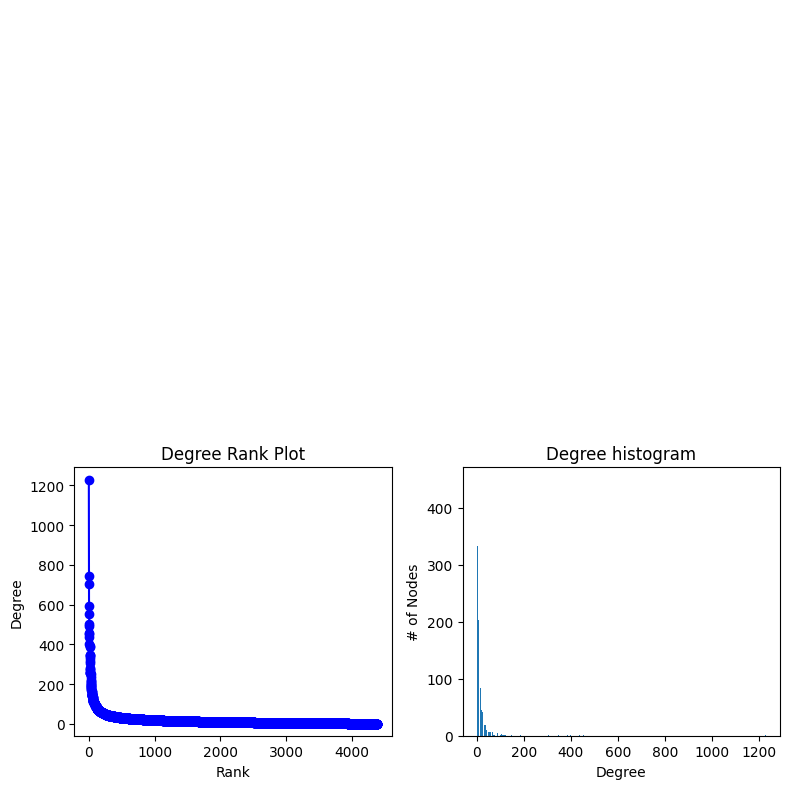

In [19]:
degree_sequence = sorted((d for n, d in TwitchSocialNetworksRU.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()